# 5 insights I found from the data give:-

## 1) Guests talk about their *Breakfast* the most than any other meal of the day in the reviews. For an establishment, Breakfast service has to be good or atleast be there. Reviews showed more citations for Breakfast than any other meal(..lunch,dinner)!


## 2) *Cleanliness* is noticed a lot and in some instances it is the first thing that is noticed. This includes rooms, beds, bedsheets, hallways and -'the most importantly'- for the bathrooms. Almost all citations of 'bathrooms' were negative(complaints). Small bathrooms were a big concern to guests.

## 3) The most important time for a guest is 'Night'- and so for the hotel. Night time citations showed a lot of complaints especially noises and unresposive service.

## 4) Guest consider two things the greatest over any other service or quality of the hotel ->
## 'Location' & 'Staff' - for every citation of great, good, nice, all has been about Location of the establishment and Staff working there. 

## 5) Most of the reviews are coming from the United States.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

**MY METHADOLOGY**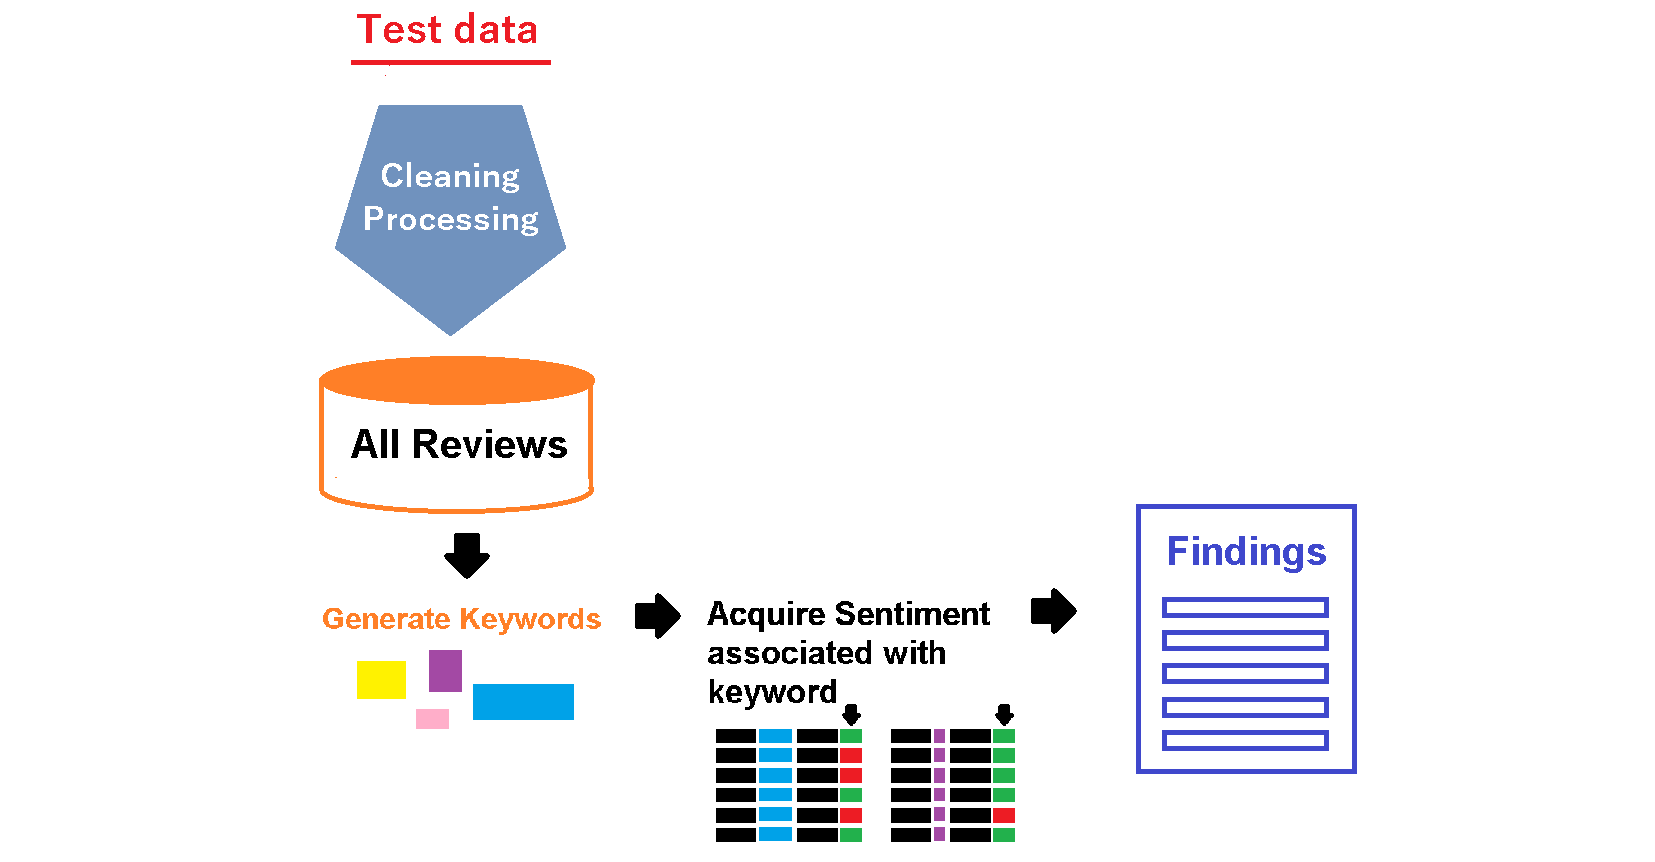

### [ 1 ] Cleaning data & Transforming data

In [2]:
table = pd.read_csv('../input/reviews-data/Data Analyst - Test Data - US.csv')
print(table.shape)
table.head()

(6448, 3)


,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


1.1 Removing all rows with no **Review** data

In [3]:
table[table.Review.isnull()]#.dropna(inplace = True)

,Review,date,Location
33,NaN,2019/08/17,"Grand Cayman, Cayman Islands"
263,NaN,2019/07/27,Oregon
560,NaN,2019/07/01,Maryland has
877,NaN,2019/05/22,NaN
1034,NaN,2019/05/11,NaN
1091,NaN,2019/05/07,Gallipoli is a small Island with a Radius of 500m
1114,NaN,2019/05/06,NaN
1150,NaN,2019/05/03,NaN
1217,NaN,2019/04/29,NaN
1244,NaN,2019/04/27,NaN


In [4]:
table = table[table['Review'].notna()]
table.shape

(6393, 3)

In [5]:
print(table.Review[0])

I was very impressed with the resort.
 Great staff at the main resort pool bar! We had a blast with them.
 Clean, professional staff, great location and very reasonable!
  
  Read more
  Read less


this needs to be cleaned

In [6]:
table.dtypes

Review      object
date        object
Location    object
dtype: object

1.2 Creating **language** column with nlp to detect language

Keeping in mind that npl model might not have a perfect accuracy but will give most results correctly

In [9]:
import spacy
from spacy_langdetect import LanguageDetector

In [10]:
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)
j = 0
language = []
for i in table.Review:
    if i == 'null':
        lang = 'NaN'
    else:
        text = i
        doc = nlp(text)
        lang = doc._.language
        #print(j)
        #print(i)
        #print(lang)
    language.append(lang)
    j = j+1
language[0:10]

[{'language': 'en', 'score': 0.9999986377969265},
 {'language': 'en', 'score': 0.9999988699282841},
 {'language': 'en', 'score': 0.9999960576633061},
 {'language': 'en', 'score': 0.9999980842696409},
 {'language': 'en', 'score': 0.9999972987469716},
 {'language': 'en', 'score': 0.9999963400669301},
 {'language': 'en', 'score': 0.999996020201796},
 {'language': 'en', 'score': 0.9999959198170424},
 {'language': 'en', 'score': 0.9999963511165504},
 {'language': 'en', 'score': 0.9999976307703704}]

In [11]:
language_list = []
for i in language:
    lang = i['language']
    language_list.append(lang)
#language_list

In [12]:
table['language']= language_list

In [13]:
table.head()

,Review,date,Location,language
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,en
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,en
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,en
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,en
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,en


We have now a language column.

Reviews in different types of languages ->

In [14]:
table.language.value_counts()

en         5865
es          165
de           89
fr           75
it           35
ja           35
pt           31
nl           23
da           18
no           11
ko           10
sv            8
et            5
af            4
zh-cn         4
fi            4
pl            2
ca            2
ru            2
sl            1
he            1
UNKNOWN       1
zh-tw         1
ar            1
Name: language, dtype: int64

In [15]:
table.Review[0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [16]:
clean = table.Review[0].strip('\n  \n  Read more\n  Read less')
clean = clean.replace('\n','')
clean

'I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!'

In [17]:
clean_list = []
for review in table.Review:
    clean = review.strip('\n  \n  Read more\n  Read less')
    clean = clean.replace('\n','')
    clean_list.append(clean)
    #print(clean)

compiled all the rows into a giant string

In [18]:
script = str(clean_list)
#print(script)
len(script)

1413790

In [19]:
first_key = script.find('night')
last_key = script.rfind('night',  0,len(script))
print(first_key)
print(last_key)

5436
1412452


In [20]:
table['review'] = clean_list
table.drop(columns = 'Review', inplace = True)
table.head()

,date,Location,language,review
0,2019/08/20,Sebastian,en,I was very impressed with the resort. Great st...
1,2019/08/20,Los Angeles,en,The rooms were nice the outside needs work als...
2,2019/08/20,Georgia,en,Great location! I have stayed at this hotel on...
3,2019/08/20,NaN,en,The hotel was adequate for my stay. The strips...
4,2019/08/19,Palm Harbor,en,"Great location, room was large and spacious. P..."


In [ ]:
#table.to_csv('clean_reviews.csv')

Appplying Sentiment analysis ML model to Reviews ->

In [21]:
table.head()

,date,Location,language,review
0,2019/08/20,Sebastian,en,I was very impressed with the resort. Great st...
1,2019/08/20,Los Angeles,en,The rooms were nice the outside needs work als...
2,2019/08/20,Georgia,en,Great location! I have stayed at this hotel on...
3,2019/08/20,NaN,en,The hotel was adequate for my stay. The strips...
4,2019/08/19,Palm Harbor,en,"Great location, room was large and spacious. P..."


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
i = 0
sia = SentimentIntensityAnalyzer()
for review in table.review:
    print("{}\n{}\n".format(review,sia.polarity_scores(text = review)))
    if i == 10:
        break
    i = i+1

I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!
{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.9421}

The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok
{'neg': 0.075, 'neu': 0.546, 'pos': 0.379, 'compound': 0.836}

Great location! I have stayed at this hotel on my last three trips to New York.
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.6588}

The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.
{'neg': 0.077, 'neu': 0.817, 'pos': 

The model predicts negative, positive or neutral sentiments. This model is not satisfactory

In [24]:
i = 0
for review in table.review:
    blob_object = TextBlob(review, analyzer=NaiveBayesAnalyzer())
    analysis = blob_object.sentiment
    print(review)
    print(analysis)
    print("\n")
    if i == 10:
        break
    i = i+1

I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!
Sentiment(classification='pos', p_pos=0.9013302678878434, p_neg=0.0986697321121573)


The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok
Sentiment(classification='pos', p_pos=0.7771868797330318, p_neg=0.2228131202669694)


Great location! I have stayed at this hotel on my last three trips to New York.
Sentiment(classification='neg', p_pos=0.29239687707703627, p_neg=0.7076031229229652)


The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt a

Although the Blob model approximates reviews pretty good but is not satisfactory because we can see- In 4th review, the person fell inside bathroom and her requests not responded, the model still percieves it as positive.

I tried the two **Sentiment Analysis** ML models but results were not satisfactory so I did not use it in final findings

Instead what I did was create a **WordCloud** from all the review data and obtained keywords. 

In [25]:
table.Location.shape

(6393,)

In [26]:
table['Location'].value_counts()

United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
                           ... 
truro                         1
Timmins , Ontario             1
New Haven, CT                 1
Ir                            1
Jersey City, NJ               1
Name: Location, Length: 1078, dtype: int64

In [27]:
locations = table[table['Location'].notna()]
locations.shape

(1705, 4)

In [28]:
locations

,date,Location,language,review
0,2019/08/20,Sebastian,en,I was very impressed with the resort. Great st...
1,2019/08/20,Los Angeles,en,The rooms were nice the outside needs work als...
2,2019/08/20,Georgia,en,Great location! I have stayed at this hotel on...
4,2019/08/19,Palm Harbor,en,"Great location, room was large and spacious. P..."
10,2019/08/19,California,en,Very clean and friendly and I love the locatio...
...,...,...,...,...
6443,2019/07/12,United States of America,en,"·the staff were all so friendly. frank, the ch..."
6444,2019/07/12,United States of America,en,·the internet barely worked or didn't work
6445,2019/07/10,United States of America,en,·the location was great. ·the bed was the ...
6446,2019/07/10,United States of America,en,·we were early for check in and the staff was ...


In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image 

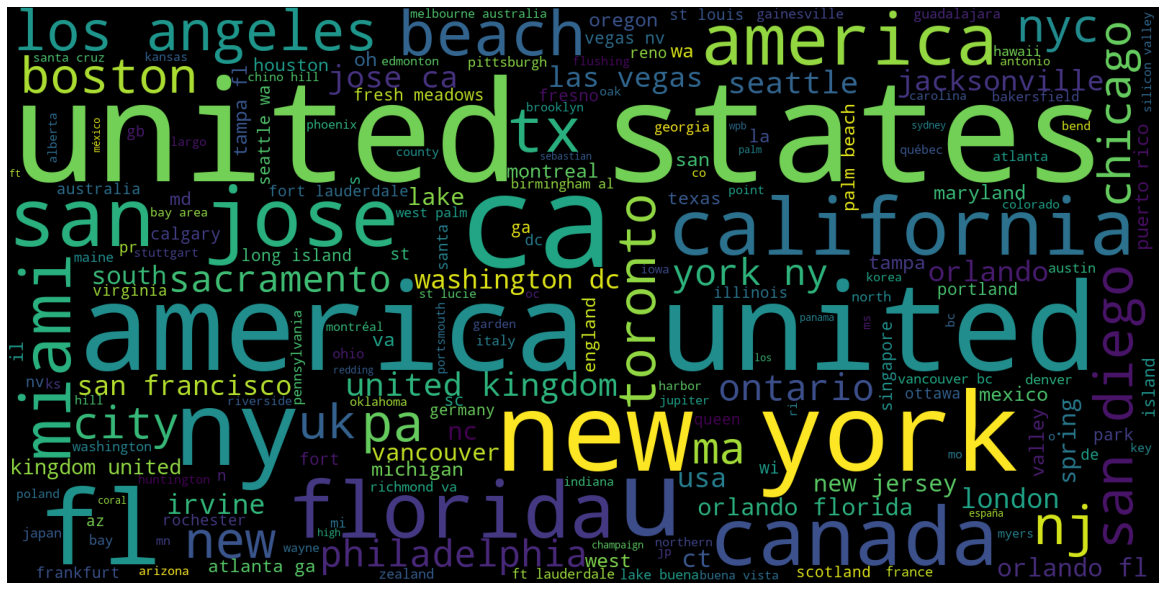

In [31]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in locations.Location:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
#wave_mask = np.array(Image.open("../input/circle2/1544077479_Circle-Shape.png"))
 
# Create the wordcloud object
#wordcloud = WordCloud(mask=wave_mask).generate(comment_words)

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                #mask = wave_mask,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [32]:
table.head()

,date,Location,language,review
0,2019/08/20,Sebastian,en,I was very impressed with the resort. Great st...
1,2019/08/20,Los Angeles,en,The rooms were nice the outside needs work als...
2,2019/08/20,Georgia,en,Great location! I have stayed at this hotel on...
3,2019/08/20,NaN,en,The hotel was adequate for my stay. The strips...
4,2019/08/19,Palm Harbor,en,"Great location, room was large and spacious. P..."


## Here is how I obtained my findings ->

### 1) I created a Wordcloud which will give me the most occurring words in all the reviews. For example these words were - staff, hotel, great,room, good, pool, breakfast,etc. The wordcloud is created below.

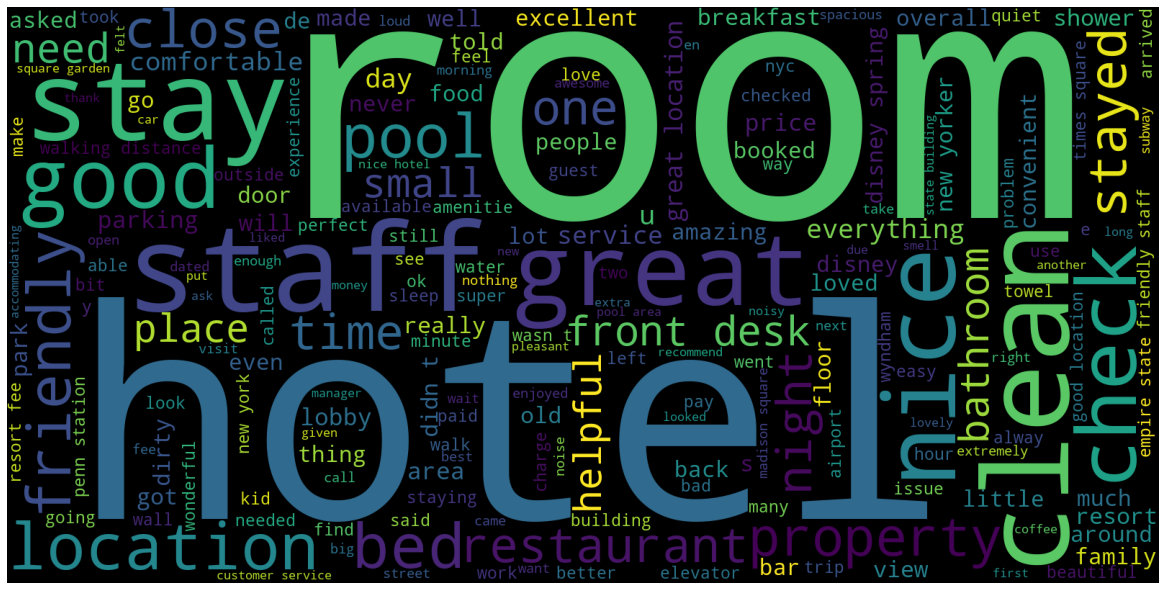

In [33]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in table.review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
#wave_mask = np.array(Image.open("../input/circle2/1544077479_Circle-Shape.png"))
 
# Create the wordcloud object
#wordcloud = WordCloud(mask=wave_mask).generate(comment_words)

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                #mask = wave_mask,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [34]:
print(wordcloud.words_)

{'room': 1.0, 'hotel': 0.7077922077922078, 'staff': 0.3246753246753247, 'clean': 0.30857142857142855, 'stay': 0.27064935064935064, 'great': 0.2545454545454545, 'nice': 0.25272727272727274, 'good': 0.1677922077922078, 'check': 0.16233766233766234, 'location': 0.1612987012987013, 'bed': 0.14597402597402598, 'pool': 0.14025974025974025, 'friendly': 0.13792207792207792, 'property': 0.1264935064935065, 'stayed': 0.12233766233766234, 'close': 0.1212987012987013, 'restaurant': 0.12077922077922078, 'time': 0.12077922077922078, 'night': 0.11974025974025974, 'one': 0.11844155844155844, 'front desk': 0.11714285714285715, 'bathroom': 0.11402597402597403, 'small': 0.11272727272727273, 'need': 0.11142857142857143, 'place': 0.10493506493506494, 'helpful': 0.10285714285714286, 'everything': 0.1025974025974026, 'u': 0.1012987012987013, 'day': 0.10051948051948052, 'comfortable': 0.09636363636363636, 'service': 0.09220779220779221, 'great location': 0.0890909090909091, 'lobby': 0.08285714285714285, 'park

In [ ]:
#print(comment_words)

### 2) Then I created a finder which will give me the sentence/context for the word everytime it was cited in the reviews. 
#### *For example*- I picked breakfast from the wordcloud and searched every citation for it. One thing I noticed was, for the three meals i.e, Breakfast, Lunch and Dinner, most citations were for the word Breakfast!(be it complaining or commending). This showed that guests are concerned a lot about their breakfast than any other meal.

For all the other findings I did the same

In [35]:
word = 'breakfast'   #NOTE: case sensitive
i = script.find(word)
j = 1
while i <= script.rfind(word,  0,len(script)):
    i = i+1
    i = script.index(word,  i,len(script))
    print("{}------{}-----------------{}".format(i, j,script[i-30:i+50]))
    j = j+1


4856------1-----------------o job interview. Nice morning breakfast at location across the street that has s
6481------2-----------------ut where was my complimentary breakfast ??????', 'Location was around the transp
6795------3-----------------as clean and i love they make breakfast sandwiches 2 for 6.00...', "Sent my pare
12818------4-----------------, 'There was no complementary breakfast but it was close to everything and Disne
15805------5-----------------d no towels in there. And the breakfast was mediocre. Not enough options.', 'The
17685------6-----------------f were not very friendly. The breakfast was not very good.  Our bed runner had s
21369------7-----------------es, neighborhood location and breakfast I would stay here again. I really liked 
21611------8-----------------ly helpful. Food was good but breakfast could have had more variety. Generally a
35109------9-----------------r. Had a less than basic free breakfast in a dingy basement.  Also, you have to 
36323------10

ValueError: substring not found

In [ ]:
noteng = table[table.language != 'en']

In [ ]:
noteng.head()

In [ ]:
from google_trans_new import google_translator  
translator = google_translator() 

In [ ]:
noteng_list = []
for i in noteng.review:
    translate_text = translator.translate(i,lang_tgt='en')  
    print(translate_text)
    noteng_list.append(translate_text)
noteng_list

In [ ]:
noteng['translate']=noteng_list
noteng.head()

In [ ]:
table.date.value_counts()

In [ ]:
table.head()

In [ ]:
date = pd.to_datetime(table.date)#,format = "%Y%M")

In [ ]:
date.value_counts()

In [ ]:
table['new_date'] = date

In [ ]:
table.head()

In [ ]:
table['month']  = pd.DatetimeIndex(table['new_date']).month
table['year'] = pd.DatetimeIndex(table['new_date']).year

In [ ]:
table.head()

In [ ]:
#table.to_csv('clean_complete_tabel.csv')

In [ ]:
table.year.value_counts()

In [ ]:
table.month.value_counts().plot.line()